# Comparación de los errores del método de Euler mejorado y el método de Euler

<ul id="top">

<li><a href="#1-El-problema-del-Robot-Móvil">1-El problema del Robot Móvil</a></li>
   
<li><a href="#2-Error-de-los-métodos-de-Euler-y-Euler-mejorado">2-Error de los métodos de Euler y Euler mejorado</a></li>
</ul>  

In [93]:
using Plots
using LinearAlgebra
include("implementacion_E_EM.jl")

RungeKuta4 (generic function with 2 methods)

## 1-El problema del Robot Móvil

Consideremos el problema de determinar la evolución de la posición y la orientación de una plataforma móvil (un robot) que se mueve en una superficie plana horizontal con dos ruedas de radio $R$ situadas en paralelo a una distancia $L$ entre sí, conocidas la evolución de las velocidades angulares $\omega_l(t)$ y $\omega_r(t)$ de la rueda izquierda y la rueda  derecha respectivamente. Dicho problema se puede modelar por medio del siguiente sistema de EDOs

<a id='Edo-Robot'></a>
\begin{equation*}
 \begin{split}
         \frac{d x}{dt} &= \pi \, R\, (\omega_l(t) +\omega_r(t))\,  \cos(\theta), \\ 
      \frac{d y}{dt} &=\pi \, R\, (\omega_l(t) +\omega_r(t))\, \sin(\theta), \\ 
      \frac{d \theta}{dt} &= \frac{2\pi \, R}{L} (\omega_r(t) - \omega_l(t)), 
    \end{split}  \hspace{12em} \tag{1}
\end{equation*}

donde $(x,y)$ son las coordenadas del centro del eje de las ruedas, $\theta$ es el ángulo formado entre el eje que une las dos rueda y el eje horizontal del sistema de coordenadas cartesianas adoptado para el plano sobre el que se mueve el robot. Consideraremos el metro como unidad de longitud, y el segundo como unidad de tiempo.

A lo largo de este ejercicio consideraremos el caso en que 

<a id='Fun-Robot'></a>
\begin{equation*}
\begin{split}
L&=0.5\, \mathrm{m}, \quad R=0.05\, \mathrm{m}, \\
\omega_l(t) &= \frac{3}{5} \sin(\pi t/125) -\frac{1}{200}, \quad 
\omega_r(t) = \frac{3}{5}\sin(\pi t/125) +\frac{1}{200},
\end{split}
\tag{2}
\end{equation*}

y el robot se sitúa inicialmente en el origen de coordenadas, orientado horizontalmente, es decir, 

<a id='Ini-Robot'></a>
\begin{equation*}
x(0) = 0, \quad y(0)=0, \quad \theta(0)=0. \hspace{16em} \tag{3}
\end{equation*}

El problema [(1)](#Edo-Robot)-[(2)](#Fun-Robot) tiene  una única solución $u(t)=(x(t),y(t),\theta(t))$.

Nuestro objetivo es estudiar el error que cometemos al aproximar las solución $u(t)=(x(t),y(t),\theta(t))$ en el intervalo temporal $t \in [0,1000]$ por medio del método de Euler mejorado y compararlo con el método de Euler.

#### 1.1- Ejercicio

**Construir el problema de valor inicial correspondiente, como una instancia del tipo compuesto ProblemaEDOs.**

In [94]:
function fRobot(du,t,u,p)
    x = u[1]
    y = u[2]
    theta  = u[3] # Ángulo del eje

    L = p[1]
    R = p[2]

    wl = (3/5) * sin(pi * t / 125) - 1/200
    wr = (3/5) * sin(pi * t / 125) + 1/200

    du[1] = pi * R * (wl + wr) * cos( theta )
    du[2] = pi * R * (wl + wr) * sin( theta )
    du[3] = 2*pi*R/L * ( wr - wl )
    
    return nothing
end

L = 0.5
R = 0.05
p = [L, R]

u0 = [0.0, 0.0, 0.0]

T = 1000.0
tspan = (0.0, T)
prob = ProblemaEDOs(fRobot, u0, tspan, p)


ProblemaEDOs{typeof(fRobot), Float64}(Main.fRobot, [0.0, 0.0, 0.0], (0.0, 1000.0), [0.5, 0.05])

#### 1.2- Ejercicio

- **Aproximar la solucion $u(t)=(x(t),y(t),\theta(t))$  para los valores de $t$ de la discretización temporal 
\begin{equation*}
t_0=0,\ t_1=4,\ t_2=8,\ldots,\ t_{249}=996,\ t_{250}=1000,
\end{equation*}
aplicando el método de Euler mejorado con longitud de paso $h=4$. Mostrar las aproximaciones de los resultados obtenidos para $t_0,t_1,\ldots,t_6$.**

In [95]:
n = 250
m = 1
sol = EulerMejorado(prob, n, m) 

print("\nt:\n", sol.t)
print("\nx:\n", [u[1] for u in sol.u])
print("\ny:\n", [u[2] for u in sol.u])
print("\ntheta:\n", [u[3] for u in sol.u])



t:
[0.0, 4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0, 32.0, 36.0, 40.0, 44.0, 48.0, 52.0, 56.0, 60.0, 64.0, 68.0, 72.0, 76.0, 80.0, 84.0, 88.0, 92.0, 96.0, 100.0, 104.0, 108.0, 112.0, 116.0, 120.0, 124.0, 128.0, 132.0, 136.0, 140.0, 144.0, 148.0, 152.0, 156.0, 160.0, 164.0, 168.0, 172.0, 176.0, 180.0, 184.0, 188.0, 192.0, 196.0, 200.0, 204.0, 208.0, 212.0, 216.0, 220.0, 224.0, 228.0, 232.0, 236.0, 240.0, 244.0, 248.0, 252.0, 256.0, 260.0, 264.0, 268.0, 272.0, 276.0, 280.0, 284.0, 288.0, 292.0, 296.0, 300.0, 304.0, 308.0, 312.0, 316.0, 320.0, 324.0, 328.0, 332.0, 336.0, 340.0, 344.0, 348.0, 352.0, 356.0, 360.0, 364.0, 368.0, 372.0, 376.0, 380.0, 384.0, 388.0, 392.0, 396.0, 400.0, 404.0, 408.0, 412.0, 416.0, 420.0, 424.0, 428.0, 432.0, 436.0, 440.0, 444.0, 448.0, 452.0, 456.0, 460.0, 464.0, 468.0, 472.0, 476.0, 480.0, 484.0, 488.0, 492.0, 496.0, 500.0, 504.0, 508.0, 512.0, 516.0, 520.0, 524.0, 528.0, 532.0, 536.0, 540.0, 544.0, 548.0, 552.0, 556.0, 560.0, 564.0, 568.0, 572.0, 576.0, 580.0, 5

> **Comprobación**
>
>Las primeros siete filas de los resultados debería coincidir con lo siguientes 
 
                 t        x          y           theta
                 0.0   [0.0,       0.0,          0.0       ]                    
                 4.0   [0.0378235, 0.000950809,  0.0251327 ]
                 8.0   [0.150841,  0.00568446,   0.0502655 ]  
                 12.0  [0.337699,  0.0179025,    0.0753982 ]   
                 16.0  [0.596162,  0.0411456,    0.100531  ]    
                 20.0  [0.923146,  0.078716,     0.125664  ]    
                 24.0  [1.31476,   0.133605,     0.150796  ]     


- **Representar en una misma figura la evolución de las funciones $x(t)$, $y(t)$, y $\theta(t)$ respecto del tiempo en el intervalo temporal $t \in [0,1000]$.**

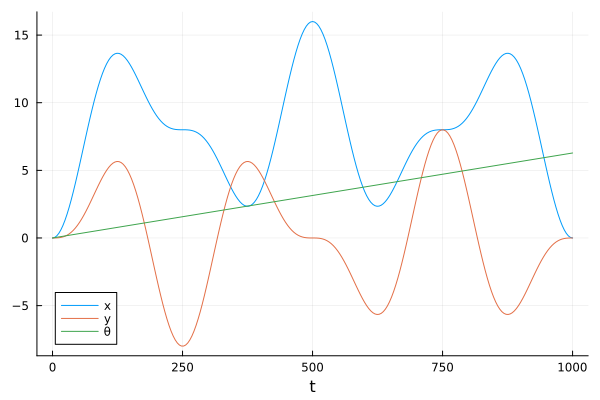

In [97]:
tt = sol.t
xx = [u[1] for u in sol.u]
yy = [u[2] for u in sol.u]
thetas = [u[3] for u in sol.u]

plot(tt,[xx, yy,thetas], xlabel="t",label=["x" "y" "θ"])

#### 1.3- Ejercicio

- **Representar en una figura la trayectoria descrita por el centro del eje de las ruedas en el plano xy**

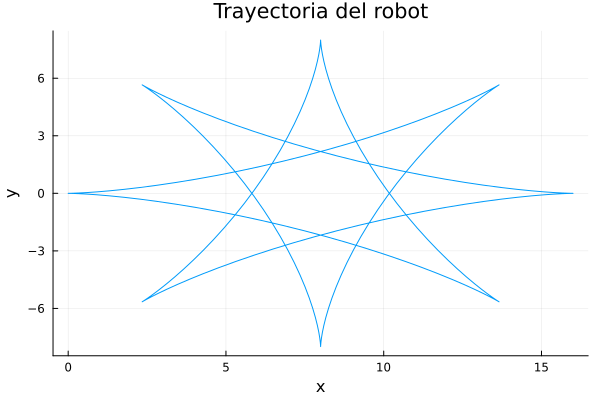

In [98]:
plot(xx, yy, title="Trayectoria del robot", xlabel="x",ylabel="y",label="")

> **Comprobación**
>
>Debería obtenerse una figura en forma de estrella de 8 puntas (que es la trayectoria que sigue la plataforma móvil). 



<a href="#top">Ir al índice</a>

## 2-Error de los métodos de Euler y Euler mejorado
**Estudio experimental del error de los métodos de Euler y Euler mejorado para un modelo simplificado de robot móvil**

#### 2.1- Ejercicio


- **Se puede comprobar que en el caso considerado en que $L$, $R$, $\omega_l(t)$, y $\theta_r(t)$ están dados por [(2)](#Fun-Robot), la solución del problema [(1)](#Edo-Robot)-[(3)](#Ini-Robot)  es exáctamente**


\begin{align*}
x(t) &= 8-5 \cos \left(\frac{3 \pi 
   t}{500}\right)-3 \cos
   \left(\frac{\pi  t}{100}\right), \\
   y(t) &= 5 \sin \left(\frac{3 \pi 
   t}{500}\right)-3 \sin
   \left(\frac{\pi  t}{100}\right), \\
   \theta(t) &= \frac{\pi}{500} t.
\end{align*}


Ello nos permite calcular el error cometido al aproximar la solución exacta  $u(t)=(x(t),y(t),\theta(t))$ en $t=t_k$ (para $k=1,2\ldots,250$) por los valores $u_k=(x_k,y_k,\theta_k)$ obtenidos en el apartado anterior por medio del método de Euler mejorado. **Calcularemos para cada $k=1,2\ldots,n$ el error cometido**

<a id='Error'></a>
\begin{equation*}
e(t_k)=||u_k -u(t_k)|| = \sqrt{(x_k-x(t_k))^2+(y_k-y(t_k))^2+(\theta_k-\theta(t_k))^2},
\hspace{4em} \tag{4}
\end{equation*}


**y representaremos dicho error respecto de los tiempos $t_k$.**

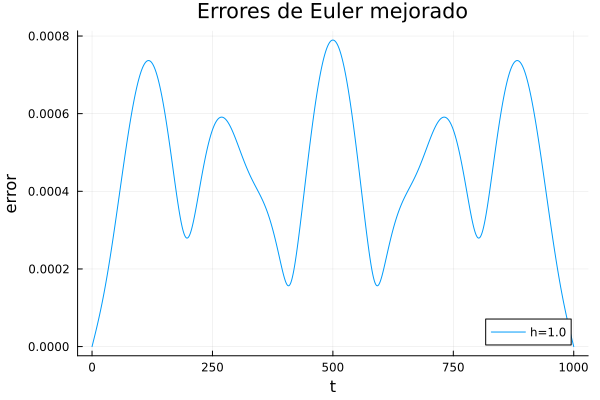

In [89]:
function RobotSol(t)
    x = 8 - 5 * cos( (3*pi*t)/ 500 ) - 3 * cos( (pi*t)/100 )
    y = 5 * sin( (3*pi*t)/ 500 ) - 3 * sin( (pi*t)/100 )
    theta = (pi*t) / 500
    return [x, y, theta]
end

function errorM(metodo,prob,n, m=1)   
    sol = metodo(prob,n,m)
    tt = sol.t
    errors = similar(tt)
    for j in 1:(n+1)
        errors[j] = norm( sol.u[j] - RobotSol(tt[j]))
    end
    return (tt,errors)
end

n = 1000
m = 1
h = T / (n*m)

(tt, erroresEM) = errorM(EulerMejorado, prob, n, m)

plot(tt,erroresEM,
     title="Errores de Euler mejorado",
     xlabel="t",ylabel="error", label=string("h=",h)) 

#### 2.2- Ejercicio

- **Para observar como disminuye el error [(4)](#Error) al considerar discretizaciones cada vez más finas, representar en una misma figura las gráficas de los errores cometidos al aplicar el método de Euler mejorado con longitudes de paso cada vez más finas, en concreto, $h=4$, $h=2$, $h=1$, y $h=0.5$.**

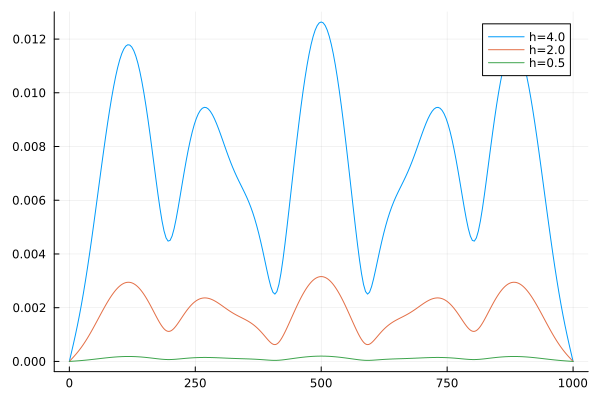

In [60]:
m = 1

h2 = 4.0 
(tt2, erroresEM2) = errorM(EulerMejorado, prob, round(Int, T / (h2 * m)), m)
plot(tt2,erroresEM2, label=string("h=",h2))

h3 = 2.0
(tt3, erroresEM3) = errorM(EulerMejorado, prob, round(Int, T / (h3 * m)), m)
plot!(tt3,erroresEM3, label=string("h=",h3))

h4 = 0.5
(tt4, erroresEM4) = errorM(EulerMejorado, prob, round(Int, T / (h4 * m)), m)
plot!(tt4,erroresEM4, label=string("h=",h4))

#### 2.3- Ejercicio

- **Representar ahora en una misma figura  las gráficas de dichos errores divididos por $h^2$ para los casos $h=4$, $h=2$, $h=1$, y $h=0.5$.**

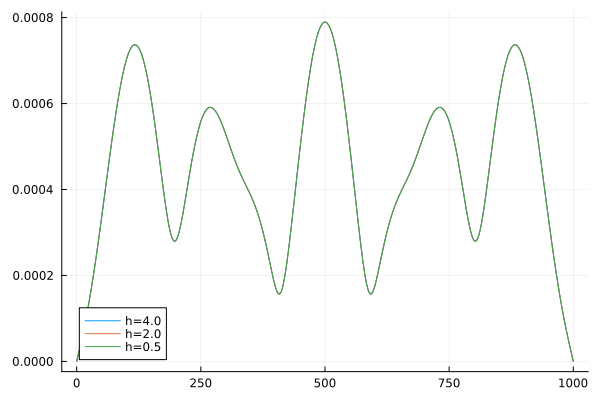

In [67]:
m = 1

h2 = 4.0 
(tt2, erroresEM2) = errorM(EulerMejorado, prob, round(Int, T / (h2 * m)), m)
plot(tt2,erroresEM2/h2^2, label=string("h=",h2))

h3 = 2.0
(tt3, erroresEM3) = errorM(EulerMejorado, prob, round(Int, T / (h3 * m)), m)
plot!(tt3,erroresEM3/h3^2, label=string("h=",h3))

h4 = 0.5
(tt4, erroresEM4) = errorM(EulerMejorado, prob, round(Int, T / (h4 * m)), m)
plot!(tt4,erroresEM4/h4^2, label=string("h=",h4))

> **Comprobación**
>
>Las cuatro gráficas prácticamente deberían superponerse, lo que indicaría que el error del método de Euler modificado a resultado (como es de esperar por ser un método de segundo orden) es aproximadamente proporcional a $h^2$. 



#### 2.4- Ejercicio

- **Repetir el apartado anterior para el método de Euler, pero representando 
respecto a los tiempos $t=t_k$ los errores [(4)](#Error) divididos por $h$.**

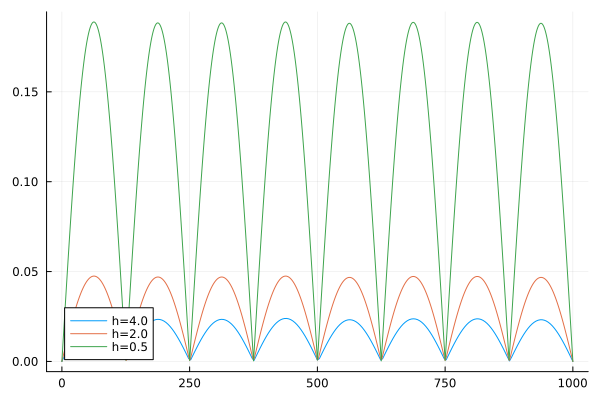

In [65]:
m = 1

h2 = 4.0 
(tt2, erroresE2) = errorM(Euler, prob, round(Int, T / (h2 * m)), m)
plot(tt2,erroresE2/h2^2, label=string("h=",h2))

h3 = 2.0
(tt3, erroresE3) = errorM(Euler, prob, round(Int, T / (h3 * m)), m)
plot!(tt3,erroresE3/h3^2, label=string("h=",h3))

h4 = 0.5
(tt4, erroresE4) = errorM(Euler, prob, round(Int, T / (h4 * m)), m)
plot!(tt4,erroresE4/h4^2, label=string("h=",h4))

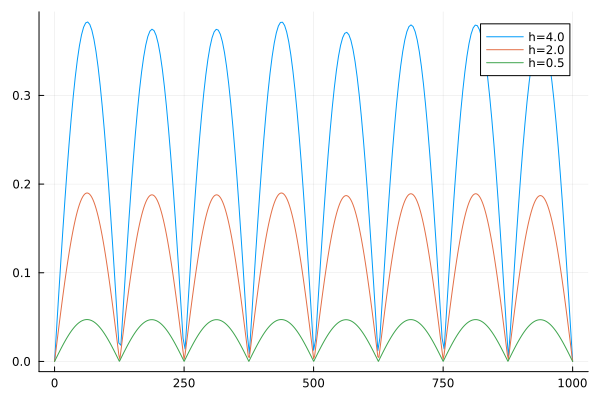

In [68]:
m = 1

h2 = 4.0 
(tt2, erroresE2) = errorM(Euler, prob, round(Int, T / (h2 * m)), m)
plot(tt2,erroresE2, label=string("h=",h2))

h3 = 2.0
(tt3, erroresE3) = errorM(Euler, prob, round(Int, T / (h3 * m)), m)
plot!(tt3,erroresE3, label=string("h=",h3))

h4 = 0.5
(tt4, erroresE4) = errorM(Euler, prob, round(Int, T / (h4 * m)), m)
plot!(tt4,erroresE4, label=string("h=",h4))

> **Comprobación**
>
>Las tres gráficas deberían ser muy parecidas, lo que indicaría que el error del método de Euler a resultado (como es de esperar por ser un método de primer orden) es aproximadamente proporcional a $h$. 



#### 2.5- Ejercicio

- **En virtud de lo deducido en los dos apartados anteriores, ¿que valor de $n$ y $h$ deberíamos tomar respectivamente en el caso del método de Euler y en el caso del método de Euler mejorado  para que el error máximo
$$\displaystyle \max_{1\leq k\leq n} ||u(t_k)-u_k|||$$ 
fuera menor que $10^{-8}$? (Hay que responder a esta pregunta utilizando sólamente los resultados de los apartados anteriores,  sin volver a aplicar el método correspondiente para valores de $n$ mayores).**

> **Respuesta para Euler**
>
> ?

In [69]:
C = maximum( erroresEM4 / h4 )
hEuler = 1e-8 / C

2.5330216716600353e-5

> **Respuesta para Euler mejorado**
>
> ?

In [70]:
K = maximum( erroresEM4/h4^2)
hEulerM = sqrt( 1e-8 / K )

0.0035588071538508767

#### 2.6- Ejercicio

 - **¿Qué podemos decir de la eficiencia
 de ambos métodos en este ejemplo, para obtener aproximaciones con errores menores que $10^{-8}$ en el intervalo temporal $[0,1000]$? (Un método es más eficiente que otro si consigue la misma precisión con menos tiempo de cálculo.)**

In [71]:
hEulerM / hEuler

140.49651424887276

> **Respuesta**
> 
>  ?

<a href="#top">Ir al índice</a>